In [393]:
from caffe2.python import workspace, brew, optimizer
from caffe2.python.model_helper import ModelHelper

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

# net visualization
from caffe2.python import net_drawer
from IPython import display

In [394]:
boston = datasets.load_boston()

In [395]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [396]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [397]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [398]:
boston_df = pd.DataFrame(boston.data)

In [399]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [400]:
# we want to have column name instead of 0,1,2, ...
boston_df.columns = boston.feature_names

In [401]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [402]:
boston_df['PRICE'] = boston.target

In [403]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [404]:
# let's shuffle the data 
boston_df = boston_df.sample(frac=1).reset_index(drop=True)

In [405]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
1,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2
2,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
3,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
4,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2


In [406]:
# we are going to create very simple neural network (for regression) only using one feature!
X = boston_df['RM']
y = boston_df['PRICE']

In [407]:
# convert x and y into numpy array
X = np.asarray(X)
y = np.asarray(y)

In [408]:
print('shape x:', X.shape)
print('shape y:',y.shape)
np.testing.assert_equal(X.shape,y.shape)

shape x: (506,)
shape y: (506,)


In [409]:
# our model expects data in 2 dimensions
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

print('shape x:', X.shape)
print('shape y:',y.shape)
np.testing.assert_equal(X.shape,y.shape)

shape x: (506, 1)
shape y: (506, 1)


In [410]:
# sample data
X[4:10]

array([[6.456],
       [5.709],
       [5.927],
       [6.402],
       [5.036],
       [6.059]])

In [411]:
# sample data
y[4:10]

array([[22.2],
       [19.4],
       [19.6],
       [22.3],
       [ 9.7],
       [20.6]])

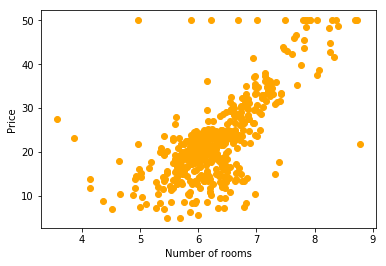

In [412]:
plt.scatter(X,y, color='orange')
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.show()

In [413]:
workspace.ResetWorkspace()

True

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [415]:
regression_model = ModelHelper(name='regression_model')

In [416]:
# fully connected layer 
# dim_in = 1 because we are only feeding one feature to the model
# dim_out = 1 because we only have one output predicted value (price)
y_pred = brew.fc(regression_model, 'X', 'y_pred', dim_in=1, dim_out=1)

In [417]:
distance = regression_model.SquaredL2Distance(['y', y_pred], 'distance')

# the loss function 
loss = regression_model.AveragedLoss(distance, 'loss')

In [418]:
# use gradient descent to train the model
regression_model.AddGradientOperators([loss])

# this is a momentum based optimizer
optimizer.build_adam(regression_model, base_learning_rate=0.1)

In [419]:
print(regression_model.net.Proto())

name: "regression_model_6"
op {
  input: "X"
  input: "y_pred_w"
  input: "y_pred_b"
  output: "y_pred"
  name: ""
  type: "FC"
  arg {
    name: "order"
    s: "NCHW"
  }
  arg {
    name: "use_cudnn"
    i: 1
  }
  arg {
    name: "cudnn_exhaustive_search"
    i: 0
  }
}
op {
  input: "y"
  input: "y_pred"
  output: "distance"
  name: ""
  type: "SquaredL2Distance"
}
op {
  input: "distance"
  output: "loss"
  name: ""
  type: "AveragedLoss"
}
op {
  input: "loss"
  output: "loss_autogen_grad"
  name: ""
  type: "ConstantFill"
  arg {
    name: "value"
    f: 1.0
  }
}
op {
  input: "distance"
  input: "loss_autogen_grad"
  output: "distance_grad"
  name: ""
  type: "AveragedLossGradient"
  is_gradient_op: true
}
op {
  input: "y"
  input: "y_pred"
  input: "distance_grad"
  output: "y_grad"
  output: "y_pred_grad"
  name: ""
  type: "SquaredL2DistanceGradient"
  is_gradient_op: true
}
op {
  input: "X"
  input: "y_pred_w"
  input: "y_pred_grad"
  output: "y_pred_w_grad"
  output: "y

In [420]:
print(regression_model.param_init_net.Proto())

name: "regression_model_init_6"
op {
  output: "y_pred_w"
  name: ""
  type: "XavierFill"
  arg {
    name: "shape"
    ints: 1
    ints: 1
  }
}
op {
  output: "y_pred_b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "shape"
    ints: 1
  }
}
op {
  output: "optimizer_iteration"
  name: ""
  type: "ConstantFill"
  arg {
    name: "shape"
    ints: 1
  }
  arg {
    name: "value"
    i: 0
  }
  arg {
    name: "dtype"
    i: 10
  }
  device_option {
    device_type: 0
    cuda_gpu_id: 0
  }
}
op {
  output: "iteration_mutex"
  name: ""
  type: "CreateMutex"
  device_option {
    device_type: 0
    cuda_gpu_id: 0
  }
}
op {
  input: "y_pred_w"
  output: "y_pred_w_first_moment"
  name: ""
  type: "ConstantFill"
  arg {
    name: "value"
    f: 0.0
  }
  device_option {
  }
}
op {
  input: "y_pred_w"
  output: "y_pred_w_second_moment"
  name: ""
  type: "ConstantFill"
  arg {
    name: "value"
    f: 0.0
  }
  device_option {
  }
}
op {
  input: "y_pred_b"
  output: "y_pred_b_first_

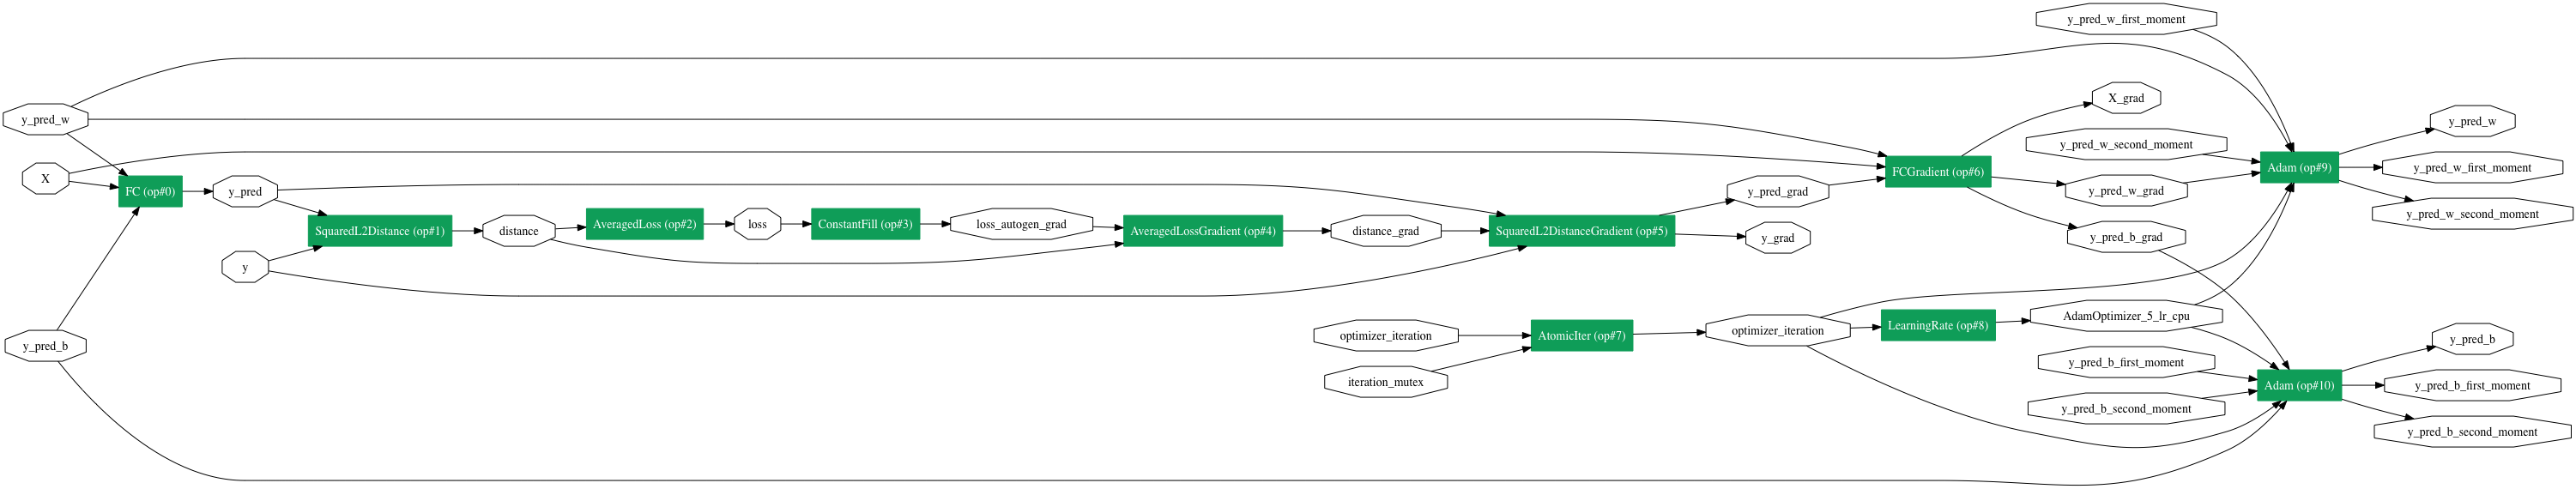

In [421]:
# LR = network layout: Left to Right
graph = net_drawer.GetPydotGraph(regression_model, rankdir="LR")
display.Image(graph.create_png(), width=800)

In [422]:
workspace.FeedBlob('X', X.astype(np.float32))
workspace.FeedBlob('y', y.astype(np.float32))

True

In [423]:
# pass the param_init_net to C for execution
workspace.RunNetOnce(regression_model.param_init_net)

True

In [424]:
# we can re-run the training network as many time as want
workspace.CreateNet(regression_model.net)

True

In [425]:
# 200 epochs
for i in range(50000):
    workspace.RunNet(regression_model.net)
    
    # every 25 epochs, prints the value of loss
    if i % 1000 == 0:
        print(workspace.FetchBlob('loss'))

175.71521
24.82963
22.065907
21.803606
21.800282
21.800278
21.800278
21.800282
21.80028
21.80028
21.800278
21.800278
21.800896
21.80489
21.80029
21.800278
21.800283
21.800282
21.800278
21.800278
21.800274
21.800276
21.80028
21.800278
21.800287
21.800278
21.801304
21.800282
21.800278
21.800278
21.800278
21.801092
21.800276
21.800274
21.80028
21.800283
21.80028
21.800282
21.800337
21.800278
21.800274
21.80678
21.800276
21.80051
21.800278
21.800388
21.800306
21.801346
21.80028
21.800278


In [426]:
workspace.Blobs()

['AdamOptimizer_5_lr_cpu',
 'X',
 'X_grad',
 'distance',
 'distance_grad',
 'iteration_mutex',
 'loss',
 'loss_autogen_grad',
 'optimizer_iteration',
 'y',
 'y_grad',
 'y_pred',
 'y_pred_b',
 'y_pred_b_first_moment',
 'y_pred_b_grad',
 'y_pred_b_second_moment',
 'y_pred_grad',
 'y_pred_w',
 'y_pred_w_first_moment',
 'y_pred_w_grad',
 'y_pred_w_second_moment']

In [427]:
weight = workspace.FetchBlob('y_pred_w')
weight.shape

(1, 1)

In [428]:
weight = weight[0]

In [429]:
bias = workspace.FetchBlob('y_pred_b')

In [430]:
bias.shape

(1,)

In [431]:
# choose the random subset of data
random_X = X[150:170]

In [432]:
random_X

array([[6.012],
       [5.613],
       [7.206],
       [5.874],
       [6.142],
       [5.949],
       [6.549],
       [5.   ],
       [6.151],
       [6.727],
       [6.219],
       [5.67 ],
       [5.951],
       [5.856],
       [6.382],
       [6.951],
       [6.211],
       [6.195],
       [6.854],
       [5.344]])

In [433]:
# we add some additional data to it
np.append(random_X, [[2],[3],[4],[5],[6],[7]])

array([6.012, 5.613, 7.206, 5.874, 6.142, 5.949, 6.549, 5.   , 6.151,
       6.727, 6.219, 5.67 , 5.951, 5.856, 6.382, 6.951, 6.211, 6.195,
       6.854, 5.344, 2.   , 3.   , 4.   , 5.   , 6.   , 7.   ])

In [434]:
regression_result = random_X * weight + bias
regression_result

array([[20.05206345],
       [16.42027594],
       [30.92011933],
       [18.79595649],
       [21.23535262],
       [19.47862332],
       [24.93995793],
       [10.84061241],
       [21.31727264],
       [26.56015386],
       [21.93622389],
       [16.93910273],
       [19.49682777],
       [18.63211646],
       [23.41988646],
       [28.59905212],
       [21.8634061 ],
       [21.71777051],
       [27.71613636],
       [13.97177759]])

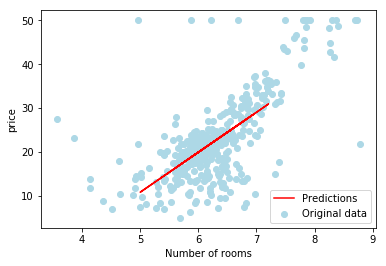

In [435]:
plt.scatter(X_train, y_train, label='Original data', color='lightblue')
plt.plot(random_X, regression_result, label='Predictions', color='red')
plt.legend()

plt.xlabel('Number of rooms')
plt.ylabel('price')

plt.show()

In [438]:
# let's test the model with the test data
X_test.shape

(102, 1)

In [439]:
range_array = X_test.reshape(-1,1)

In [447]:
results = range_array * weight + bias
# displays only 10 values
results.round(2)[10:20]

array([[22.68],
       [20.48],
       [22.97],
       [17.46],
       [19.85],
       [21.6 ],
       [21.25],
       [37.5 ],
       [18.59],
       [21.42]])

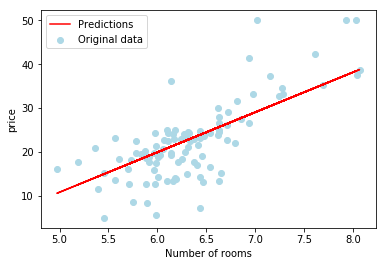

In [449]:
plt.scatter(X_test, y_test, label='Original data', color='lightblue')
plt.plot(X_test, results, label='Predictions', color='red')
plt.legend()

plt.xlabel('Number of rooms')
plt.ylabel('price')

plt.show()